We've done lots of work to clean the NYC schools data. We now have a single dataframe, `combined`, that contains all data we'll be using for analysis.

It's time to begin using the data to understand how NYC high schools' demographics (race, sex, income, etc.) affect students' academic performance.

In this file, we'll build on that knowledge as we use scatter plots to examine relationships between variables. We'll take our analyses a step further as we learn to quantify the strength of those relationships using **correlation analysis**.

As we analyze the data, we'll learn to use functions from the `tidyr` package for **reshaping** our data to make our analyses as efficient as possible.

Let's get started by importing the data into R and ensuring that it's ready for analysis.

`library(readr)
library(dplyr)`

`combined <- read_csv("combined.csv")`

**Task**

* Since we joined the six dataframes to create `combined`, there are some variables that contain redundant information. Create a new `combined` dataframe that does not contain the following columns:

    * SchoolName, SCHOOL NAME.y, Name, School Name, school_name, Location 1.
    
* Rename `SCHOOL NAME.x` to `school_name`.

**Answer**

`combined <- combined %>%
  select(-SchoolName, -`SCHOOL NAME.y`, -Name, -`School Name`, -school_name, -`Location 1`) %>%
  rename(school_name = `SCHOOL NAME.x`)`

Let's start by exploring relationships between SAT scores and several variables that provide socioeconomic or demographic information:

* `frl_percent`: The percentage of a school's students who are eligible for [receiving school lunch at a discount](https://www.fns.usda.gov/cn/income-eligibility-guidelines) based on household income.

* `ell_percent`: The percentage of a school's students who are [learning to speak English](https://www.edglossary.org/english-language-learner/).

* `sped_percent`: The percentage of a school's students [who receive specialized instruction](https://en.wikipedia.org/wiki/Special_education) to accommodate special needs such as learning or physical disabilities.

If we view SAT scores as an indicator of academic performance, these visualizations can provide insight into how these demographic variables may be related to schools' academic performance.

**Task**

* Use `ggplot()` to create scatter plots to investigate relationships between the following variables:

    * `frl_percent` and `avg_sat_score`.
    * `ell_percent` and `avg_sat_score`.
    * `sped_percent` and `avg_sat_score`.
    
* Since we are interested in how the demographic variables may affect `avg_sat_score`, place `avg_sat_score` on the y-axis.

* We will learn more about handling missing values later. For now, don't worry about warning messages like the following, which occur because ggplot cannot plot missing values.

`Warning message:
“Removed 77 rows containing missing values (geom_point).”`


**Answer**

`library(ggplot2)
ggplot(data = combined,
  aes(x = frl_percent, y = avg_sat_score)) +
  geom_point()`

`ggplot(data = combined,
  aes(x = ell_percent, y = avg_sat_score)) +
  geom_point()`

`ggplot(data = combined,
  aes(x = sped_percent, y = avg_sat_score)) +
  geom_point()`

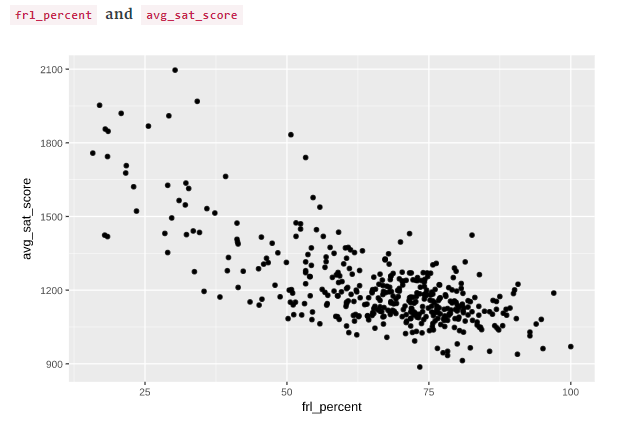


Generally, as `frl_percent` increases, `avg_sat_score` decreases.

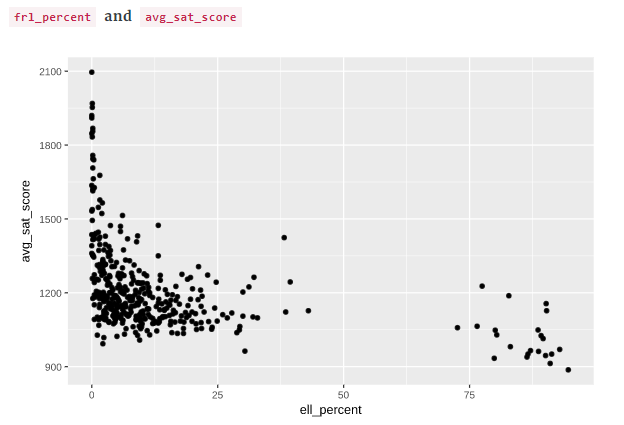

The relationship between `ell_percent` and `avg_sat_score` is interesting. As `ell_percent` increases, `avg_sat_score` very rapidly decreases. There are few schools with `ell_percent` between 50 percent and 75 percent, but a number of schools with `ell_percent` greater than 75 percent. The scatter plot demonstrates that those schools have low values of `avg_sat_score`.

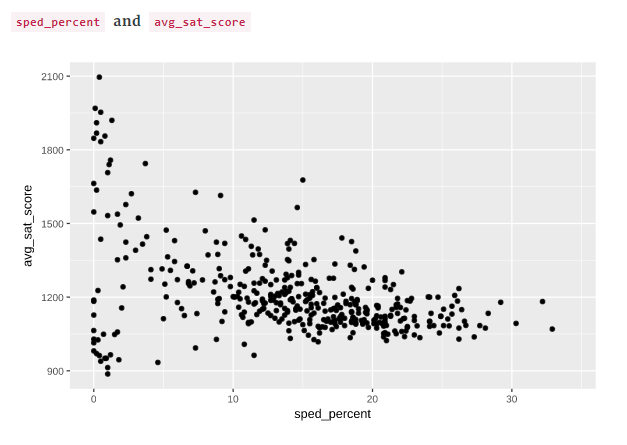

Although there are some schools with quite low values of both variables, in general, `avg_sat_score` decreases as `sped_percent` increases.

These scatter plots reveal different relationships between the demographic variables and `avg_sat_score`. While viewing the scatter plots on separate axes does allow for visualization of relationships, recall that sometimes plotting variable relationships on the same axis can improve the effectiveness of a visualization.

The variables `frl_percent`, `ell_percent`, and `sped_percent` all share the same unit (percent), and all are being compared with `avg_sat_score`. Therefore, we could plot the three demographic variables using different colors to distinguish them, creating a plot that looks like this:

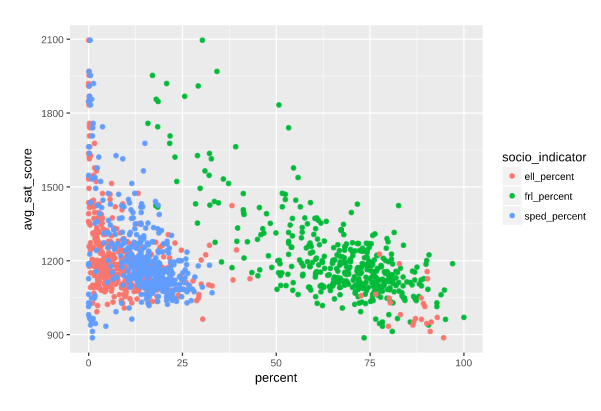

How would we write the code to create a plot of the three variable relationships on a single axis? Remember that, in the `aes()` layer, we can map variables to the x-axis, y-axis, and to aesthetics like color. This allows us to visualize three variables at once. The syntax looks similar to the following:

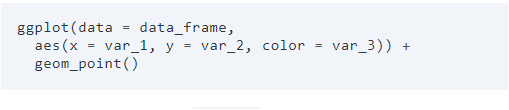

There's one problem: the `combined` dataframe is not currently organized properly for this task. The three variables we want to visualize are not organized into three separate columns:

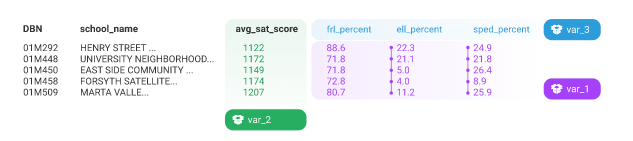

The percentages of students for `frl_percent`, `ell_percent`, and `sped_percent` are organized into three columns instead of one, and the names `frl_percent`, `ell_percent`, and `sped_percent` are column titles instead of being values of a variable.

Instead, we need to reorganize the dataframe to have each variable that we'll need to create the plot in its own column:

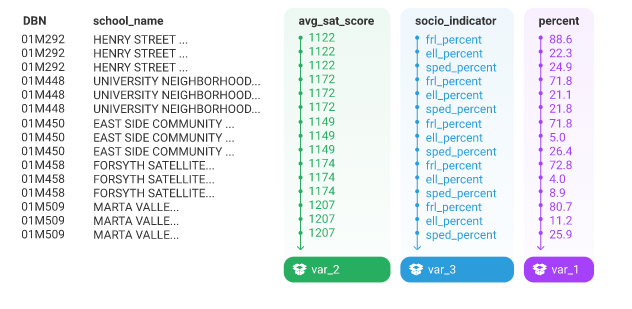

Changing dataframe organization, otherwise known as **"reshaping"** data, is a common task we'll need to perform as we clean and analyze data.

For such tasks, we'll find many useful functions in the [package tidyr](https://tidyr.tidyverse.org/). Let's load the package.

**Task**

* Load the `tidyr` package into R.

* For our local tests, we advise to update the `tidyr` package to its current version by doing this:

    `install.packages("tidyr")`
    
**Answer**

`library(tidyr)`

We need to modify the dataframe so the names `frl_percent`, `ell_percent`, and `sped_percent` are values of one variable, and the percentages of students are another variable.

In situations like this, where we increase the number of rows and decrease the number of columns, we'll need to use the [pivot_longer() function](https://tidyr.tidyverse.org/reference/pivot_longer.html) from the tidyr package. The dataframe is longer because the output dataframe is **longer** than the input one. If we are using an earlier version of tidyr (version 0.8.3 or before), the [gather() function](https://www.tidyverse.org/blog/2019/09/tidyr-1-0-0/) was used instead of `pivot_longer()`. We don't cover the` gather()` function here.

The `pivot_longer()` function takes **targeted columns** and collapses them into **key-value pairs**, duplicating all other columns as needed. The targeted columns are provided to the `pivot_longer()` function through the parameter `cols`. In our example, the targeted variables would be the socioeconomic indicators represented by the columns `frl_percent`, `ell_percent`, and `sped_percent`.

* The **key** parameter is the name of the targeted columns, stored as a new single column. In our example, the names of the targeted variables would be "frl_percent", "ell_percent", and "sped_percent". We want to store them in a new column called `socio_indicator`.

* The **value** parameter refers to the values contained in the targeted columns, stored as a new single column. In our example, the values would be the percent of students contained in the columns `frl_percent`, `ell_percent`, and `sped_percent`.We want to store them in a new column called `percent`.

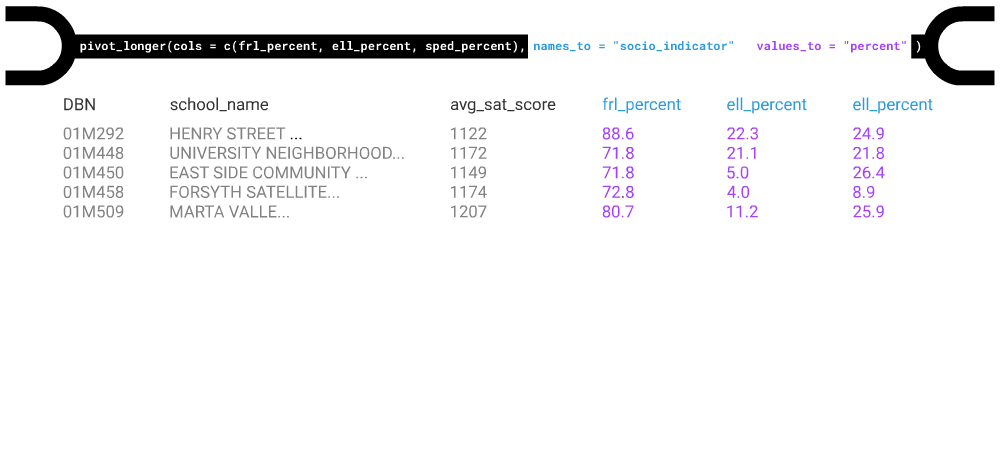

In [2]:
from IPython.display import Image

Image("gathered_combined_anim.gif")

To create a new dataframe, `combined_socio_longer`, that has separate columns for `socio_indicator` and `percent`, we would write:

`combined_socio_longer <- combined %>%
  pivot_longer(cols = c(frl_percent, ell_percent, sped_percent),
               names_to = "socio_indicator",
               values_to = "percent")`

Using the reshaped data, we could then create a scatter plot that shows the points that represent relationships between `avg_sat_score` and the different socioeconomic indicators using different colors:

`ggplot(data = combined_socio_longer,
  aes(x = percent, y = avg_sat_score, color = socio_indicator)) +
  geom_point()`

**Task**

* Create a single scatter plot that shows the relationships between schools' percentage of students of different races (the variables `asian_per`, `black_per`, `hispanic_per`, and `white_per`) and schools' average SAT scores (`avg_sat_score`).

    * Use different colors to distinguish among the four race groups.
    
    

* To create the plot, we'll need to reshape the data using the tidyr function `pivot_longer()`.

    * The target variables are `asian_per`, `black_per`, `hispanic_per`, and `white_per`.
    * The name of the keys variable is `"race"`.
    * The name of the values variable is `"percent"`.
    * Save the output as `combined_race_longer`.
    
    
**Answer**

`combined_race_longer <- combined %>%
  pivot_longer(cols = asian_per:white_per, 
               names_to = "race", 
               values_to = "percent")`

`ggplot(data = combined_race_longer,
  aes(x = percent, y = avg_sat_score, color = race)) +
  geom_point()`

We learned how to transform a dataframe into a longer dataframe by increasing the number of rows and decreasing the number of columns. Before we continue our examination of the relationship between the variables, let's talk about the inverse transformation.

We need to modify the dataframe, `combined_socio_longer`, so the values of the variable `socio_indicator` become a dataframe's variables containing values the percentages of students from the variable `percent`:

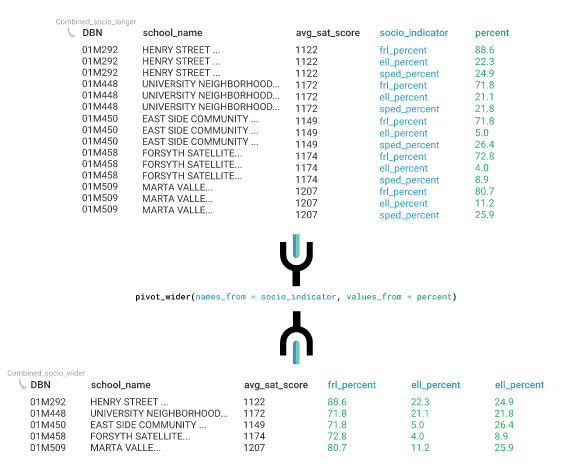

In situations like this, where we decrease the number of rows and increase the number of columns, we'll need to use the `pivot_wider()` function from the tidyr package. The dataframe is wider because the output dataframe is wider than the input one. If we are using an earlier version of tidyr (version 0.8.3 or before), the `spread()` function was used instead of `pivot_wider()`. We don't cover the `spread()` function here.

The `pivot_wider()` function takes two parameters (`names_from` and `values_from`) and expands `names_from` variable into distinct columns containing values from `values_from` parameter.

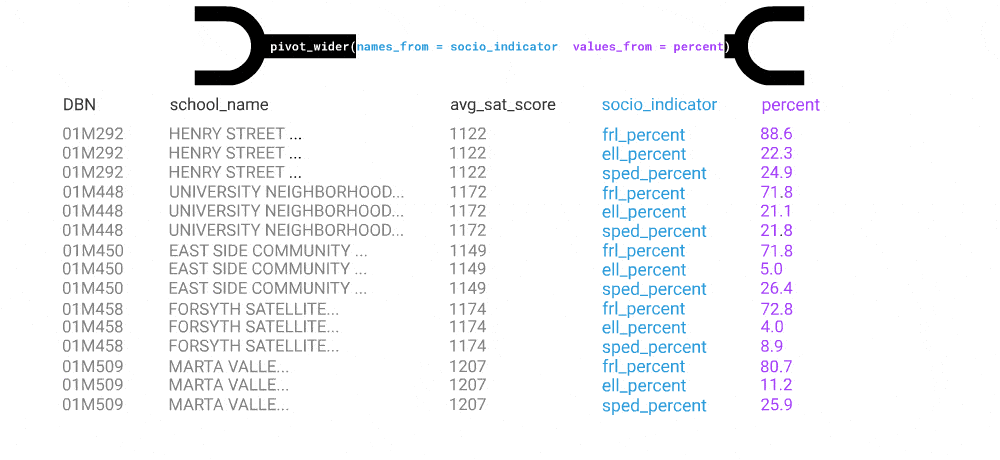

In [3]:
Image("spreaded_combined_anim.gif")

To create a new dataframe, `combined_socio_wider`, that has separate columns for each distinct value of `socio_indicator` containing the `percent` column's values, we would write:

`combined_socio_wider <- combined_socio_longer %>%
  pivot_wider(names_from = socio_indicator,
              values_from = percent)`

**Task**

* Reshape the `combined_race_longer` dataframe using the `tidyr` function `pivot_wider()` such that:

    * The names from the `race` variable become variables.
    * The values for the new variables are from the `percent` variable.
    * Save the output as `combined_race_wider`.
    
**Answer**

`combined_race_wider <- combined_race_longer %>%
  pivot_wider(names_from = race,
              values_from = percent)`

We've now reshaped the data and created a scatter plot that shows the relationships between schools' percentage of students of different races and schools' average SAT scores using points of different colors for each group:

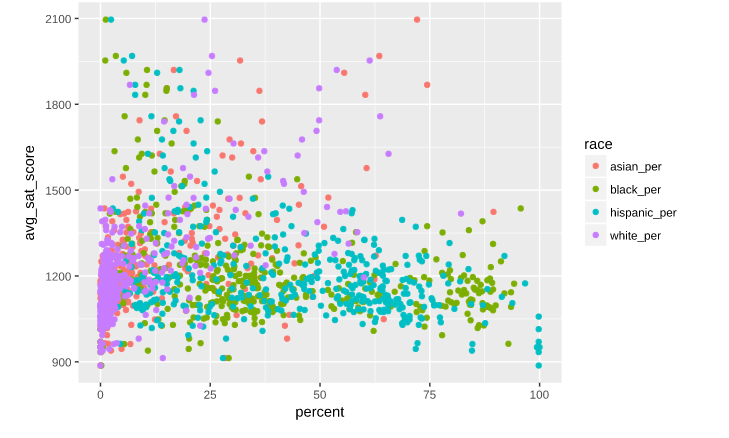

In this instance, the points have significant overlap, and it would be difficult to see differences among the four groups even if we were to make the points transparent. Remember, it's common to iterate among different types and styles of visualization as we explore our data. Let's try faceting the plot by group to see if it makes our visualization clearer:

`ggplot(data = combined_race,
  aes(x = percent, y = avg_sat_score, color = race)) +
  geom_point() +
  facet_wrap(~race)`

The resulting plot makes it easier to see the differences among groups:

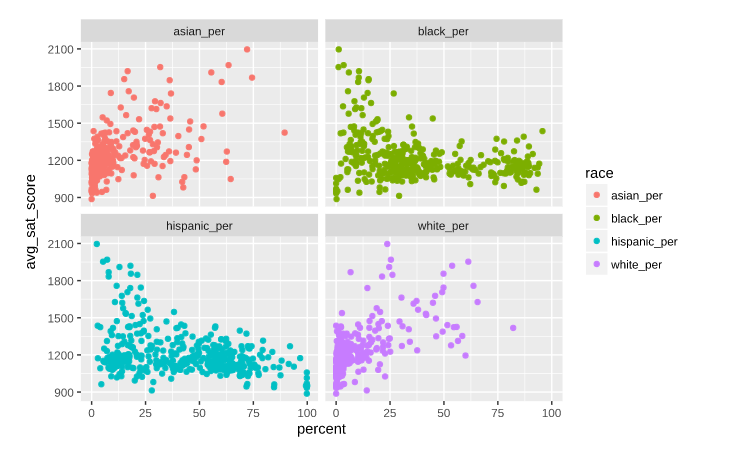

It seems that while the percentages of white and asian students display positive relationships with SAT score, the percentages of black and hispanic students display a negative relationship with SAT score.

This finding may be explained by the existence of [pervasive inequalities](https://www2.ed.gov/about/offices/list/ocr/letters/colleague-resourcecomp-201410.pdf) in how resources are allocated to schools with a high number of black and hispanic students. Such schools are less likely to have experienced teachers, advanced courses, and high-quality instructional materials that help prepare students for the SAT.

As we look at the four scatter plots above, can we figure out which race percentage has the strongest relationship with `avg_sat_score`?

What was our answer to the question we asked above? Despite knowing how to use scatter plots to understand relationships between variables, did we find it difficult to identify the strongest relationship?

Now that we've learned to understand and visualize relationships between variables, we can take our analysis a step further by **quantitatively** assessing the strength of relationships between variables by calculating their [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence).

**Correlation** is a **statistic** that quantifies the strength of the **relationship** between two variables.

To test for correlation between pairs of variables, we'll calculate the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), a commonly used measure of the correlation between two variables. Pearson's correlation coefficient is also referred to as "Pearson's r" or "r".

Pearson's r has a value between **+1 and −1**. The closer a correlation coefficient is to zero, the weaker the relationship between the two variables is. The closer it is to -1 or 1, the stronger the relationship is. Generally, r values above .25 or below -.25 are enough to qualify a correlation as potentially interesting and worthy of further investigation, and r values above 0.75 or below -0.75 indicate strong relationships:

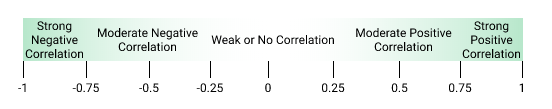

Here are some illustrations of scatter plots associated with different values of Pearson's correlation coefficient (r):

**Weak or no correlation**: r = 0.08




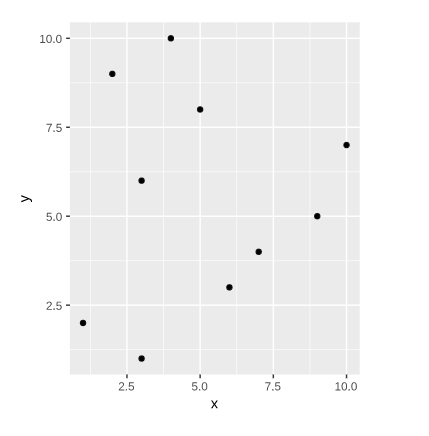

The correlation coefficient is very small, indicating that the relationship between x and y is weak.

**Negative correlation**: r = -0.83

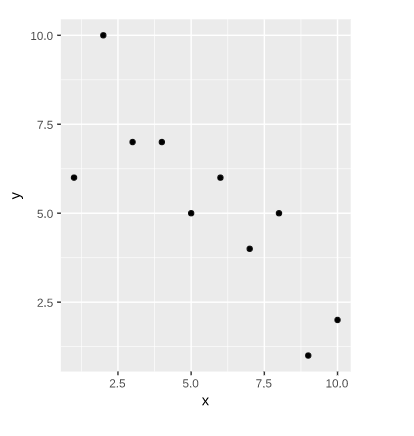

The correlation coefficient is negative and is relatively large, in keeping with the apparent negative relationship between x and y.

**Strong positive correlation**: r = 0.97

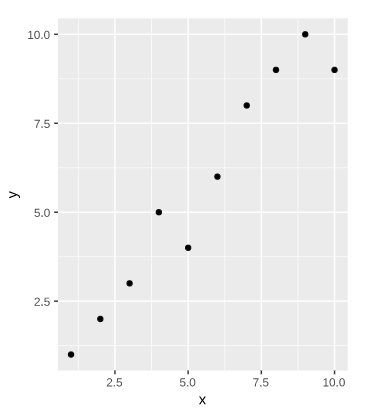

The correlation coefficient is positive and is close to 1, which suggests a strong, positive relationship between x and y.

To calculate r for two vector variables, we can use the base R function `cor()`.

`cor(vector_1, vector_2, use = "pairwise.complete.obs")`

When using the `cor()` function, `NAs` are "contagious", as is often the case in R. If either of our vector variables contains `NA`, the function output will also be `NA`. We specify `pairwise.complete.obs` in the `cor()` function so that cases with `NAs` will not be included in the calculation of the correlation coefficient between a pair of variables. 

**Task**

* Calculate Pearson's r for `asian_per` and `avg_sat_score`.

**Answer**

`round(cor(combined$avg_sat_score, combined$asian_per, use = "pairwise.complete.obs"),7)`

An r value of 0.57 indicates a moderately strong, positive relationship between `asian_per` and `avg_sat_score`.

Having a precise value for the correlation coefficient allows for comparison among multiple relationships between pairs of variables.

To illustrate how such comparisons work, let's return to our analysis of the relationships between schools' percentages of students of different races and average SAT scores.

To avoid writing out the `cor()` function repeatedly, we can calculate r for multiple pairs of variables at once by creating a [correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices).

A correlation matrix is a table that contains correlation coefficients for pairs of variables, with each cell in the table showing the correlation between two variables. If we select multiple variables and call the `cor()` function:


`combined %>%
  select(avg_sat_score, black_per, hispanic_per, white_per, asian_per) %>%
  cor(use = "pairwise.complete.obs")`
  
 The output will be a correlation matrix
 
 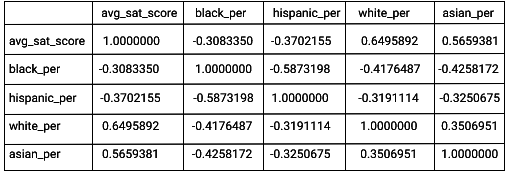

Because of how correlation matrices are arranged, there will be two cells that contain the correlation for each pair of variables. The column and the row highlighted in the correlation matrix below both contain values of r for the relationships between `avg_sat_score` and percentages of students of different races:

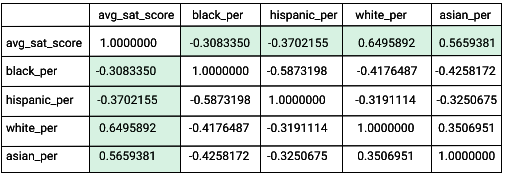

Notice that cells running diagonally from the top left to the bottom right of the correlation matrix contain values of one:

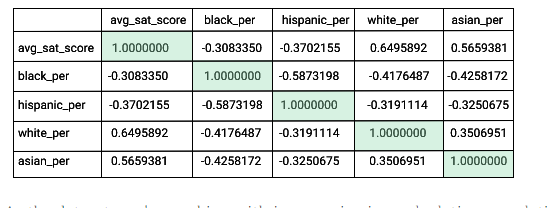

As the datasets we're working with increase in size, calculating correlation coefficients among all numeric variables can be a good way to decide which relationships to explore further using visualizations and focus on while planning further analysis.

**Task**

* Create a correlation matrix for all numeric variables in the combined dataframe. Save the matrix as `cor_mat`.

* To select numeric variables to include in the correlation matrix, we can use `select_if(is.numeric)`.

**Answer**

`cor_mat <- combined %>% select_if(is.numeric) %>% cor(use = "pairwise.complete.obs")`

We've now generated a correlation matrix that we can use to quickly assess relationships between all variables and decide which to investigate in greater depth.

When we worked through the example above, it was fairly easy to visually inspect the correlation matrix we generated and identify pairs of variables with moderate or strong correlations. However, the correlation matrix we generated in this case is quite large — it contains correlation coefficients for all possible pairs of thirty variables.

It will make more sense for us to programmatically identify interesting relationships in the correlation matrix.

First, let's think about the correlation coefficients we want to identify within the correlation matrix:

* Let's continue focusing on the relationship between `avg_sat_score` and other variables. This means that, at this point, we will not focus on correlation coefficients that describe the relationships between other pairs of variables, such as `total_enrollment` and `ell_percent`.

Remember, we are interested in relationships that are moderate or strong, as indicated by correlation coefficients that are greater than 0.25 or less than -0.25.

To make the matrix easier to manipulate using tools like `select()` and `filter()`, let's start by converting it to a tibble, the tidyverse version of a dataframe. Recall that the function for converting a matrix or base R dataframe to a tibble is `as_tibble()`.

Although the default behavior of `as_tibble()` is to drop the name attributes associated with the `cor_mat matrix`, we can specify inclusion of these names in a named column in the new dataframe. In the example below, the new column is named "variable:"

`cor_tib <- cor_mat %>%
  as_tibble(rownames = "variable")`

Now that we have a dataframe (tibble) version of the correlation matrix, we can:

* Select the columns that contain relationships between all variables paired with `avg_sat_score` and the names of the variables.
* Filter the selected columns to retain only rows with correlation coefficient values greater than 0.25 or less than -0.25.

`sat_cors <- cor_tib %>%
  select(variable, avg_sat_score) %>%
  filter(avg_sat_score > 0.25 | avg_sat_score < -0.25)`

The resulting table `sat_cors` contains a summary of the variable relationships we're interested in:

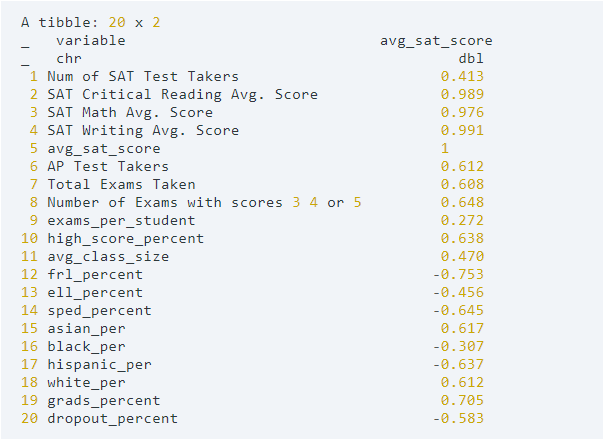

Like SAT scores, AP exam scores can provide information about academic performance in NYC schools.

Let's investigate the relationship between performance on AP exams and demographic factors using the variable `high_score_percent`.

**Task**

1. Previously, we created a correlation matrix, `cor_mat`, that contains correlation coefficients for all numeric variables in `combined`. We then converted that matrix into a dataframe, `cor_tib`. Manipulate `cor_tib` to return a summary of the correlation coefficients that meet the following criteria:

    * Describe relationships between `high_score_percent` and other variables.
    * Describe moderate to strong relationships (correlation coefficients < than -0.25 OR > than 0.25).

`cor_tib <- cor_mat %>%
  as_tibble(rownames = "variable")`

`apscore_cors <- cor_tib %>%
  select(variable, high_score_percent) %>%
  filter(high_score_percent > 0.25 | high_score_percent < -0.25)`

Let's take a moment to discuss some of the notable correlations between demographic variables and SAT scores.

**Relationships Between Demographic Variables and SAT Scores**

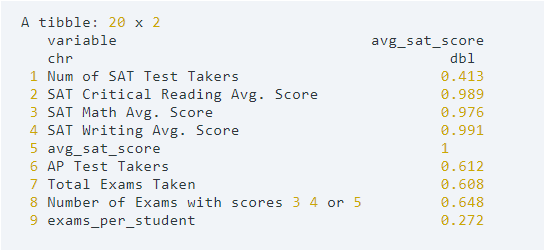

The demographic variables that display **positive** correlations with SAT scores are ones that are generally associated with wealthier areas with better-funded schools, such as variables that describe the number of students who have the opportunity to take AP exams (`AP Test Takers`, `Total Exams Taken`, `Number of Exams with scores 3 4 or 5`, and `high_score_percent`) and the percentage of students who successfully graduate (`grads_percent`).

Those that display **negative** correlations with SAT scores are ones that tend to be associated with less wealthy areas and poorly funded schools, such as percentage of students who qualify for free or reduced lunch (`frl_percent`) and are English language learners (`ell_percent`).

The correlations also highlight racial inequality of SAT scores, and show that schools with higher percentages of asian and white students tend to have higher average SAT scores, while schools with higher percentages of hispanic and black students tend to have lower SAT scores.

Our analysis suggests that students who come from communities with certain demographic and socioeconomic features may be at a disadvantage when it comes to performance on standardized tests.